In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import time
from selenium import webdriver
import seaborn as sns
import numpy as np
import matplotlib.cm as cm 

!pip install selenium
!apt-get update
!apt install chromium-chromedriver

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

You should consider upgrading via the '/Users/apple/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
zsh:1: command not found: apt-get
The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 99
Current browser version is 101.0.4951.64 with binary path /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
Stacktrace:
0   chromedriver                        0x000000010ebf9159 chromedriver + 5120345
1   chromedriver                        0x000000010eb86b13 chromedriver + 4651795
2   chromedriver                        0x000000010e776e68 chromedriver + 392808
3   chromedriver                        0x000000010e79d1e6 chromedriver + 549350
4   chromedriver                        0x000000010e798c72 chromedriver + 531570
5   chromedriver                        0x000000010e7956ed chromedriver + 517869
6   chromedriver                        0x000000010e7cf825 chromedriver + 755749
7   chromedriver                        0x000000010e7c9a33 chromedriver + 731699
8   chromedriver                        0x000000010e79f5dd chromedriver + 558557
9   chromedriver                        0x000000010e7a04f5 chromedriver + 562421
10  chromedriver                        0x000000010ebb638d chromedriver + 4846477
11  chromedriver                        0x000000010ebd021c chromedriver + 4952604
12  chromedriver                        0x000000010ebd5a12 chromedriver + 4975122
13  chromedriver                        0x000000010ebd0b4a chromedriver + 4954954
14  chromedriver                        0x000000010ebab5b0 chromedriver + 4801968
15  chromedriver                        0x000000010ebeaf78 chromedriver + 5062520
16  chromedriver                        0x000000010ebeb0ff chromedriver + 5062911
17  chromedriver                        0x000000010ec00545 chromedriver + 5150021
18  libsystem_pthread.dylib             0x00007ff80bb824e1 _pthread_start + 125
19  libsystem_pthread.dylib             0x00007ff80bb7df6b thread_start + 15


In [80]:
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [81]:
url = 'http://buking.kr/rank.php?m=mg&st=md&gi=1&si=%EC%84%9C%EC%9A%B8'
html = requests.get(url)
bs = BeautifulSoup(html.content, "html.parser")
location = bs.find("td", {'class' : "td2 ilink"})
money = bs.find("td", {'class' : "td2rp"})

In [82]:
cnt = 2
location = str(location).split('>')
value = {}
for i in location :
    key = location[cnt].split('<')[0][3:]
    value[key] = [int(location[cnt+4].split('<')[0])]
    if(location[cnt].split('<')[0][3:]) == '도봉구' : break
    cnt += 18

In [83]:
value['강남구']

[4974]

In [84]:
data = pd.read_csv('data/우리동네키움센터 .csv', encoding='cp949')
data1 = pd.read_csv('data/지역아동센터 시설현황정보 .csv', encoding='cp949')

In [85]:
for i in range(len(data['자치구명'].unique())) :
    index = str(data['자치구명'].value_counts().index[i])
    value1 = int(data['자치구명'].value_counts()[i])
    
    value[index].append(value1)


for i in range(len(data1['자치구명'].unique())) :
    index = str(data1['자치구명'].value_counts().index[i])
    value1 = int(data1['자치구명'].value_counts()[i])
    
    value[index].append(value1)


In [86]:
for i in value.keys() :
    value[i].append(value[i][1] + value[i][2])

In [87]:
value

{'강남구': [4974, 7, 4, 11],
 '서초구': [4687, 6, 11, 17],
 '용산구': [4002, 7, 5, 12],
 '성동구': [3839, 11, 12, 23],
 '송파구': [3545, 16, 19, 35],
 '마포구': [3290, 7, 11, 18],
 '광진구': [3248, 10, 13, 23],
 '동작구': [3033, 13, 22, 35],
 '영등포구': [2969, 12, 17, 29],
 '양천구': [2897, 3, 24, 27],
 '중구': [2738, 7, 4, 11],
 '강동구': [2738, 6, 23, 29],
 '종로구': [2733, 6, 12, 18],
 '서대문구': [2602, 7, 7, 14],
 '성북구': [2437, 10, 27, 37],
 '동대문구': [2384, 4, 14, 18],
 '강서구': [2332, 4, 20, 24],
 '노원구': [2154, 28, 24, 52],
 '관악구': [2137, 2, 27, 29],
 '은평구': [2036, 9, 27, 36],
 '구로구': [1953, 17, 24, 41],
 '강북구': [1952, 3, 21, 24],
 '중랑구': [1938, 3, 23, 26],
 '금천구': [1871, 3, 27, 30],
 '도봉구': [1728, 6, 17, 23]}

In [88]:
data2 = pd.read_csv('data/childbirth_subsidy.csv')
data2

,Unnamed: 0,첫째,둘째
0,강남구,30,100
1,강동구,20,30
2,강북구,0,30
3,강서구,0,30
4,관악구,10,20
5,광진구,10,30
6,구로구,0,30
7,금천구,30,50
8,노원구,0,20
9,도봉구,10,30


In [89]:
data2['합계'] = 0
for i in range(len(data2)) :
    data2.iloc[i,3] = data2.iloc[i,1] + data2.iloc[i,2]
type(data2)

pandas.core.frame.DataFrame

In [90]:
data2.columns = ['자치구명', '첫째', '둘째', '합계']

In [91]:
for i in range(len(data2['자치구명'].unique())) :
    index = str(data2['자치구명'].value_counts().index[i])
#     print(index)
    value1 = data2[data2['자치구명'] == index]['합계'].values[0]
#     print(value1)
    value[index].append(value1)

In [92]:
value

{'강남구': [4974, 7, 4, 11, 130],
 '서초구': [4687, 6, 11, 17, 80],
 '용산구': [4002, 7, 5, 12, 120],
 '성동구': [3839, 11, 12, 23, 20],
 '송파구': [3545, 16, 19, 35, 30],
 '마포구': [3290, 7, 11, 18, 60],
 '광진구': [3248, 10, 13, 23, 40],
 '동작구': [3033, 13, 22, 35, 80],
 '영등포구': [2969, 12, 17, 29, 60],
 '양천구': [2897, 3, 24, 27, 50],
 '중구': [2738, 7, 4, 11, 130],
 '강동구': [2738, 6, 23, 29, 50],
 '종로구': [2733, 6, 12, 18, 130],
 '서대문구': [2602, 7, 7, 14, 30],
 '성북구': [2437, 10, 27, 37, 40],
 '동대문구': [2384, 4, 14, 18, 90],
 '강서구': [2332, 4, 20, 24, 30],
 '노원구': [2154, 28, 24, 52, 20],
 '관악구': [2137, 2, 27, 29, 30],
 '은평구': [2036, 9, 27, 36, 45],
 '구로구': [1953, 17, 24, 41, 30],
 '강북구': [1952, 3, 21, 24, 30],
 '중랑구': [1938, 3, 23, 26, 60],
 '금천구': [1871, 3, 27, 30, 80],
 '도봉구': [1728, 6, 17, 23, 40]}

In [93]:
data3 = pd.read_csv('data/2020서울특별시_합계출산율.csv', encoding='cp949')
data3 = data3.drop(0)
data3 = data3.loc[:, ['시군구별', '합계출산율']]
data3.columns = ['자치구명', '합계출산율']
data3

,자치구명,합계출산율
1,종로구,0.522
2,중구,0.688
3,용산구,0.634
4,성동구,0.783
5,광진구,0.527
6,동대문구,0.699
7,중랑구,0.660
8,성북구,0.676
9,강북구,0.550
10,도봉구,0.601


In [94]:
index = str(data3['자치구명'].value_counts().index[0])
value1 = data3[data3['자치구명'] == index]['합계출산율'].values[0]
value1

0.522

In [95]:
for i in range(len(data3['자치구명'])) :
    index = str(data3['자치구명'].value_counts().index[i])
    value1 = data3[data3['자치구명'] == index]['합계출산율'].values[0]
    value[index].append(value1)

In [97]:
# 평당단가, 우리동네키움센터, 지역아동센터, 구별_돌봄센터, 출산장려금, 출산율
value

{'강남구': [4974, 7, 4, 11, 130, 0.537],
 '서초구': [4687, 6, 11, 17, 80, 0.656],
 '용산구': [4002, 7, 5, 12, 120, 0.634],
 '성동구': [3839, 11, 12, 23, 20, 0.783],
 '송파구': [3545, 16, 19, 35, 30, 0.665],
 '마포구': [3290, 7, 11, 18, 60, 0.594],
 '광진구': [3248, 10, 13, 23, 40, 0.527],
 '동작구': [3033, 13, 22, 35, 80, 0.655],
 '영등포구': [2969, 12, 17, 29, 60, 0.705],
 '양천구': [2897, 3, 24, 27, 50, 0.644],
 '중구': [2738, 7, 4, 11, 130, 0.688],
 '강동구': [2738, 6, 23, 29, 50, 0.748],
 '종로구': [2733, 6, 12, 18, 130, 0.522],
 '서대문구': [2602, 7, 7, 14, 30, 0.685],
 '성북구': [2437, 10, 27, 37, 40, 0.676],
 '동대문구': [2384, 4, 14, 18, 90, 0.699],
 '강서구': [2332, 4, 20, 24, 30, 0.675],
 '노원구': [2154, 28, 24, 52, 20, 0.695],
 '관악구': [2137, 2, 27, 29, 30, 0.474],
 '은평구': [2036, 9, 27, 36, 45, 0.623],
 '구로구': [1953, 17, 24, 41, 30, 0.737],
 '강북구': [1952, 3, 21, 24, 30, 0.55],
 '중랑구': [1938, 3, 23, 26, 60, 0.66],
 '금천구': [1871, 3, 27, 30, 80, 0.668],
 '도봉구': [1728, 6, 17, 23, 40, 0.601]}

In [108]:
result = pd.DataFrame(value, index = ['평당단가', '우리동네키움센터', '지역아동센터', '구별_돌봄센터', '출산장려금', '출산율'])
result = result.transpose()

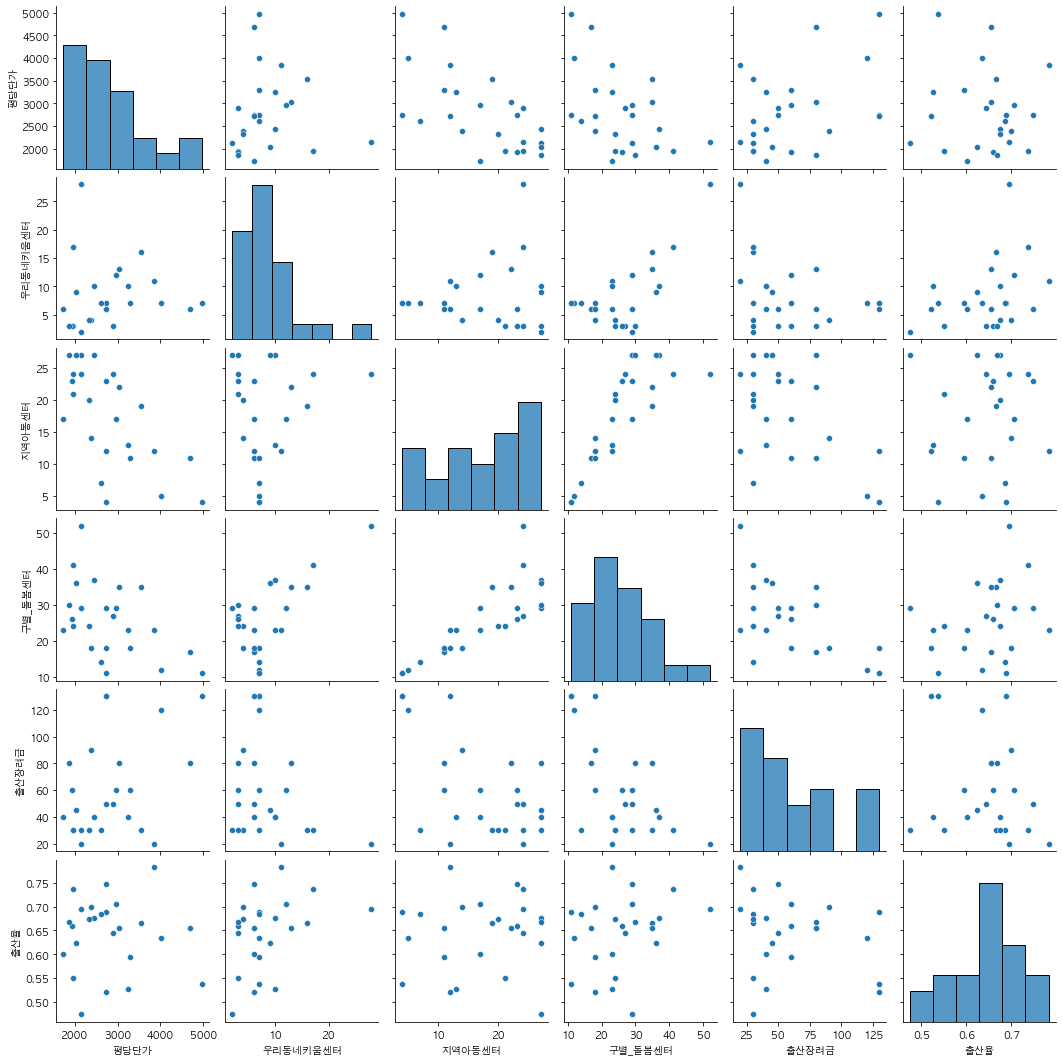

In [110]:
sns.pairplot(result[['평당단가', '우리동네키움센터', '지역아동센터', '구별_돌봄센터', '출산장려금', '출산율']])
plt.show()

In [112]:
import statsmodels.api as sm
model = sm.OLS.from_formula("출산율 ~ 평당단가 + 구별_돌봄센터 + 출산장려금", data=result)
result1 = model.fit()

In [114]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    출산율   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.6649
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.583
Time:                        14:52:14   Log-Likelihood:                 30.660
No. Observations:                  25   AIC:                            -53.32
Df Residuals:                      21   BIC:                            -48.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5822      0.104      5.616      0.0

In [ ]:
# R-squeared가 0.4 이상이고, p-value가 0.05 보다 작다면 유의한 결과가 나왔다고 할 수 있다.

In [115]:
model = sm.OLS.from_formula("평당단가 ~ 출산율", data=result)
result1 = model.fit()